# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [3]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [10]:
# load imdb dataset as pandas dataframe
data = pd.read_csv("imdb_1000.csv") 

In [11]:
# show first 5 rows of imdb_df
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [167]:
# load bikes dataset as pandas dataframe
d = pd.read_csv('bikes.csv')

In [168]:
# show first 3 rows of bikes_df
print(d.iloc[:3])

  Date;;Rachel / Papineau;Berri1;Maisonneuve_2;Maisonneuve_1;Brébeuf;Parc;PierDup;CSC (Côte Sainte-Catherine);Pont_Jacques_Cartier
0          01/01/2012;00:00;16;35;51;38;5;26;10;0;27                                                                              
1         02/01/2012;00:00;43;83;153;68;11;53;6;1;21                                                                              
2        03/01/2012;00:00;58;135;248;104;2;89;3;2;15                                                                              


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [22]:
# list columns of imdb_df
data = pd.read_csv("imdb_1000.csv") 
list(data.columns)

['star_rating', 'title', 'content_rating', 'genre', 'duration', 'actors_list']

In [23]:
# what are the datatypes of values in columns
data = pd.read_csv("imdb_1000.csv") 
data.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [24]:
# list first 5 movie titles
list(data.head())

['star_rating', 'title', 'content_rating', 'genre', 'duration', 'actors_list']

In [30]:
# show only movie title and genre

l = data[['title', 'genre']]
print(l)


                                               title      genre
0                           The Shawshank Redemption      Crime
1                                      The Godfather      Crime
2                             The Godfather: Part II      Crime
3                                    The Dark Knight     Action
4                                       Pulp Fiction      Crime
..                                               ...        ...
974                                          Tootsie     Comedy
975                      Back to the Future Part III  Adventure
976  Master and Commander: The Far Side of the World     Action
977                                      Poltergeist     Horror
978                                      Wall Street      Crime

[979 rows x 2 columns]


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [33]:
# show the type of duration column
l = data[['duration']]
print(l.dtypes)

duration    int64
dtype: object


In [31]:
# show duration values of movies as numpy arrays
import numpy as np
data.title.values


array(['The Shawshank Redemption', 'The Godfather',
       'The Godfather: Part II', 'The Dark Knight', 'Pulp Fiction',
       '12 Angry Men', 'The Good, the Bad and the Ugly',
       'The Lord of the Rings: The Return of the King',
       "Schindler's List", 'Fight Club',
       'The Lord of the Rings: The Fellowship of the Ring', 'Inception',
       'Star Wars: Episode V - The Empire Strikes Back', 'Forrest Gump',
       'The Lord of the Rings: The Two Towers', 'Interstellar',
       "One Flew Over the Cuckoo's Nest", 'Seven Samurai', 'Goodfellas',
       'Star Wars', 'The Matrix', 'City of God', "It's a Wonderful Life",
       'The Usual Suspects', 'Se7en', 'Life Is Beautiful',
       'Once Upon a Time in the West', 'The Silence of the Lambs',
       'Leon: The Professional', 'City Lights', 'Spirited Away',
       'The Intouchables', 'Casablanca', 'Whiplash', 'American History X',
       'Modern Times', 'Saving Private Ryan', 'Raiders of the Lost Ark',
       'Rear Window', 'Psycho'

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [32]:
# convert all the movie titles to uppercase
def up(cell):
        return cell.upper()
# convert all the movie titles to uppercase

data['title']=data['title'].apply(up)
data


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,POLTERGEIST,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


## Plotting a column

Use ``.plot()`` function!

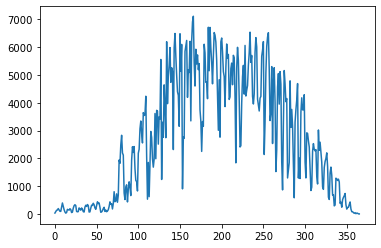

In [34]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt
d=pd.read_csv(r'bikes.csv',sep=";")
d['Berri1'].plot()
plt.show()

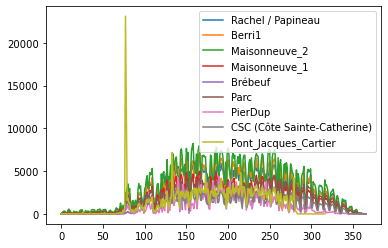

In [35]:
# plot all the columns of bikes_df
d.plot()
plt.show()


## Value counts

Get count of unique values in a particular column/Series.

In [37]:
# what are the unique genre in imdb_df?
data.genre.value_counts()


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

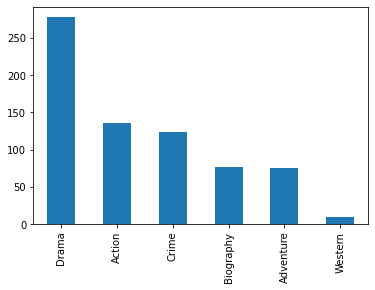

In [238]:
## plotting value counts of unique genres as a bar chart
data.genre.value_counts().plot(kind='bar')

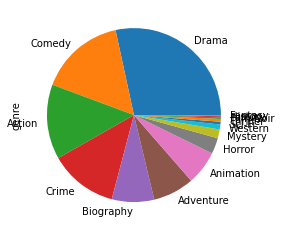

In [20]:
# plotting value counts of unique genres as a pie chart
data.genre.value_counts().plot(kind='pie')


## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [45]:
# show index of bikes_df
d = pd.read_csv("bikes.csv")  
d.index 



RangeIndex(start=0, stop=366, step=1)

In [172]:
# get row for date 2012-01-01
d = pd.read_csv('bikes.csv', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')

d.loc['2012-01-01']



Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                            5
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier              27
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [27]:
# show 11th row of imdb_df using iloc
data.iloc[[10]]

,star_rating,title,content_rating,genre,duration,actors_list
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


## Selecting rows where column has a particular value

In [110]:
#select only movies which genre is adventure
data = pd.read_csv("imdb_1000.csv")
data.loc[data['genre'] == "Adventure"]


,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,Labyrinth,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,The NeverEnding Story,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [56]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
print(data['genre'].value_counts())

data.loc[(data['star_rating']>8) & (data['duration']>130) ]
data['genre'].value_counts().head(1)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


Drama    278
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [161]:
# add a weekday column to bikes_df
d = pd.read_csv('bikes.csv', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
d.insert(2,"weekday","yes")
#s = pd.date_range('01/01/2012', '31/12/2012', freq='D').to_series()
#s.dt.dayofweek
#d.append(s.dt.dayofweek, ignore_index = True)

## Deleting an existing column from DataFrame

In [160]:
# remove column 'Unnamed: 1' from bikes_df
d = pd.read_csv('bikes.csv', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
d["weekday"]=""
d
d.drop(columns='Unnamed: 1' )


,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,8,12,7,4,NaN,1,2,0,NaN,
2012-12-28,0,35,3,38,NaN,0,0,0,NaN,
2012-12-29,0,27,8,42,NaN,9,0,0,NaN,


## Deleting a row in DataFrame

In [149]:
# remove row no. 1 from bikes_df
d.drop(d.index[0])

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0
2012-01-06,00:00,75,146,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN
2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN
2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [119]:
# group imdb_df by movie genres
data = pd.read_csv("imdb_1000.csv")

data.groupby(['genre'])

data.groupby('genre').groups


{'Action': Int64Index([  3,  11,  12,  19,  20,  36,  37,  43,  44,  45,
             ...
             884, 885, 896, 906, 908, 918, 954, 963, 967, 976],
            dtype='int64', length=136),
 'Adventure': Int64Index([  7,  10,  14,  15,  54,  68,  71,  85, 101, 114, 120, 128, 133,
             137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299,
             309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424,
             429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605,
             629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898,
             900, 909, 911, 932, 935, 936, 937, 943, 953, 975],
            dtype='int64'),
 'Animation': Int64Index([ 30,  55,  61,  64,  69,  81, 117, 126, 131, 147, 160, 167, 192,
             193, 241, 256, 277, 294, 303, 305, 308, 332, 343, 357, 378, 381,
             386, 395, 414, 417, 443, 453, 461, 471, 487, 489, 494, 498, 501,
             512, 518, 541, 607, 617, 625, 656, 657, 664, 669, 6

In [73]:
# get crime movies group
data = pd.read_csv("imdb_1000.csv")
grouped = data.groupby('genre')
print (grouped.get_group('Crime'))

     star_rating                     title content_rating  genre  duration  \
0            9.3  The Shawshank Redemption              R  Crime       142   
1            9.2             The Godfather              R  Crime       175   
2            9.1    The Godfather: Part II              R  Crime       200   
4            8.9              Pulp Fiction              R  Crime       154   
21           8.7               City of God              R  Crime       130   
..           ...                       ...            ...    ...       ...   
927          7.5                     Brick              R  Crime       110   
931          7.4              Mean Streets              R  Crime       112   
950          7.4                     Bound              R  Crime       108   
969          7.4       Law Abiding Citizen              R  Crime       109   
978          7.4               Wall Street              R  Crime       126   

                                           actors_list  
0    [

In [75]:
# get mean of movie durations for each group
data.groupby(['genre']).mean()


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [181]:
# change duration of all movies in a particular genre to mean duration of the group
data['duration'] = data.groupby(['genre'])['duration'].transform('mean') 
display (data)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,107.602564,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,102.517241,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [186]:
# drop groups/genres that do not have average movie duration greater than 120.

data.drop(data[data['duration'] <120].index) 
display(data)
  


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,122.298387,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,122.298387,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,122.298387,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,126.485294,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,122.298387,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
972,7.4,Blue Valentine,NC-17,Drama,126.539568,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126.539568,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
975,7.4,Back to the Future Part III,PG,Adventure,134.840000,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,126.485294,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [234]:
# group weekday wise bikers count

d.groupby(['weekday'])

#d.groupby('weekday').groups
d.groupby('weekday')['Parc'].value_counts()

weekday  Parc
0        12      1
         25      1
         51      1
         53      1
         91      1
                ..
6        2089    1
         2182    1
         2324    1
         2328    1
         2668    1
Name: Parc, Length: 363, dtype: int64

In [216]:
# get weekday wise biker count
d.loc[:,'weekday'] = d.index.weekday
weekday_wise = d.groupby('weekday').aggregate(sum)
weekday_wise 


,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,
0,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0
1,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0
2,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0
3,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0
4,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0
5,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0
6,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0


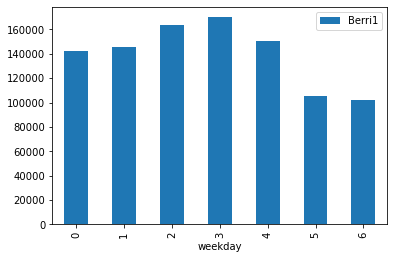

In [194]:
# plot weekday wise biker count for 'Berri1,
d = pd.read_csv('bikes.csv', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
berri= d[['Berri1']].copy()
berri.loc[:,'weekday'] = berri.index.weekday
weekday_wise = berri.groupby('weekday').aggregate(sum)
weekday_wise.plot(kind='bar')

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)